# 6.5 Boundary Conditions

We specify the value of the function at two differnet points (instead of the function and its derivative at the beginning)

##### Shooting method

It is a trial and error method that searches for the correct values of the initial conditions that match the boundary

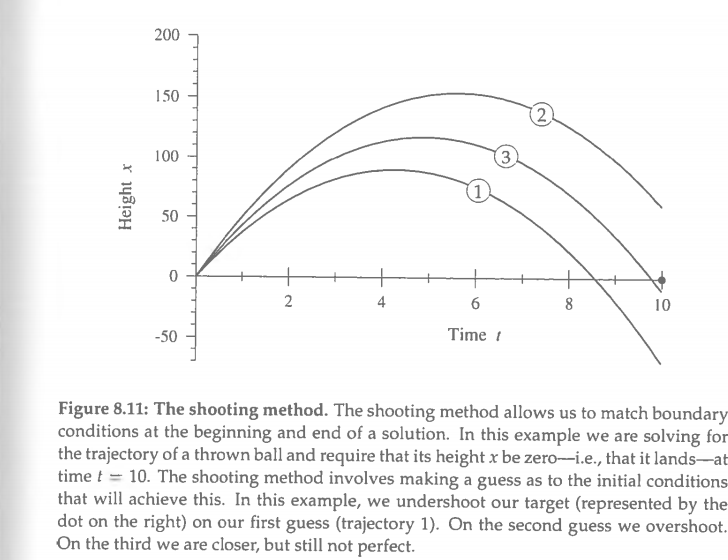

For example, say we want to solve $ d^2 x / dt^2 = -g$ <br>
With $x(t=0) = 0$ and $x(t_1) = 0$

We look at the problem a different way, in principle there is a function $x = f(v)$ which gives the height $x$ of the ball at time $t_1$ as a function of the initial velocity $v$. <br>
We don't now this function, but we can calculate it by solveing the ODE with the initial velocty <br>
And then find the value of $v$ that gives the correct $xf$

In [1]:
from numpy import array,arange

g = 9.81         # Acceleration due to gravity
a = 0.0          # Initial time
b = 10.0         # Final time
N = 1000         # Number of Runge-Kutta steps
h = (b-a)/N      # Size of Runge-Kutta steps
target = 1e-10   # Target accuracy for binary search

# Function for Runge-Kutta calculation
def f(r):
    x = r[0]
    y = r[1]
    fx = y
    fy = -g
    return array([fx,fy],float)

# Function to solve the equation and calculate the final height
def height(v):
    r = array([0.0,v],float)
    for t in arange(a,b,h):
        k1 = h*f(r)
        k2 = h*f(r+0.5*k1)
        k3 = h*f(r+0.5*k2)
        k4 = h*f(r+k3)
        r += (k1+2*k2+2*k3+k4)/6
    return r[0]

# Main program performs a binary search
v1 = 0.01
v2 = 1000.0
h1 = height(v1)
h2 = height(v2)

while abs(h2-h1)>target:
    vp = (v1+v2)/2
    hp = height(vp)
    if h1*hp>0:
        v1 = vp
        h1 = hp
    else:
        v2 = vp
        h2 = hp

v = (v1+v2)/2
print("The required initial velocity is",v,"m/s")

The required initial velocity is 49.04999999999815 m/s


#### Eigenvalue Problems

Say we want to solve
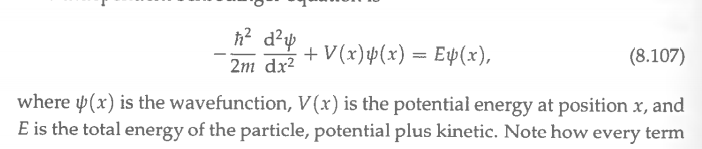

Condiser the problem of a particle in a squre potential wll with infinitely high walls, that is   $V(x) = \begin{cases} 
0 \;\;\;\; , 0 < x < L \\
\infty \;\;\;\;\; , cc
\end{cases}$




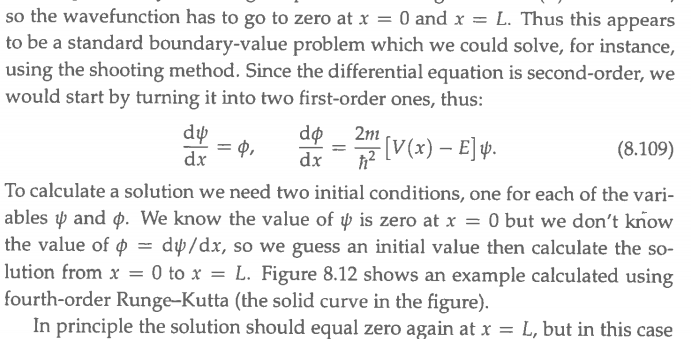!


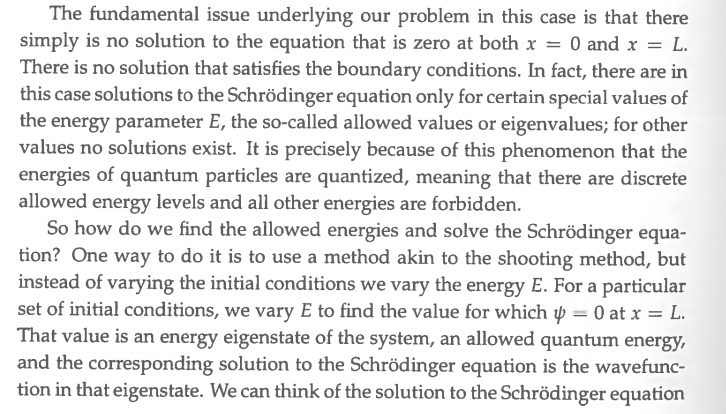

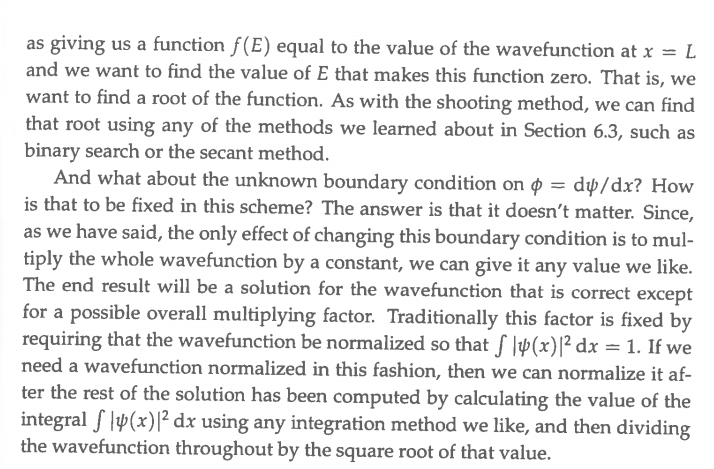

In [2]:
from numpy import array,arange

# Constants
m = 9.1094e-31     # Mass of electron
hbar = 1.0546e-34  # Planck's constant over 2*pi
e = 1.6022e-19     # Electron charge
L = 5.2918e-11     # Bohr radius
N = 1000
h = L/N

# Potential function
def V(x):
    return 0.0

def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi = phi
    fphi = (2*m/hbar**2)*(V(x)-E)*psi
    return array([fpsi,fphi],float)

# Calculate the wavefunction for a particular energy
def solve(E):
    psi = 0.0
    phi = 1.0
    r = array([psi,phi],float)

    for x in arange(0,L,h):
        k1 = h*f(r,x,E)
        k2 = h*f(r+0.5*k1,x+0.5*h,E)
        k3 = h*f(r+0.5*k2,x+0.5*h,E)
        k4 = h*f(r+k3,x+h,E)
        r += (k1+2*k2+2*k3+k4)/6

    return r[0]

# Main program to find the energy using the secant method
E1 = 0.0
E2 = e
psi2 = solve(E1)

target = e/1000
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2)
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)

print("E =",E2/e,"eV")

E = 134.28637169369105 eV
